In [1]:
import boto3
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

from sagemaker import Session

# Initialize a SageMaker session
sagemaker_session = Session()



role = "arn:aws:iam::016114370410:role/tf-binding-sites"

prefix = "inference/output/FOXA1-22Rv1-2024-07-29-11-49-59/"
local_dir = "/Users/wejarrard/projects/tf-binding/data/jsonl_output"


# Initialize the S3 client
s3 = boto3.client('s3')

# Specify your S3 bucket name
bucket_name = sagemaker_session.default_bucket()


# Function to download files from an S3 bucket
def download_from_s3(bucket_name, prefix, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)

    # List objects within the specified prefix
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)

    # Iterate over each object
    for obj in response.get('Contents', []):
        key = obj['Key']
        # Skip if it's a folder
        if key.endswith('/'):
            continue
        local_path = os.path.join(local_dir, os.path.basename(key))
        
        # Download the file
        s3.download_file(bucket_name, key, local_path)
        print(f'Downloaded {key} to {local_path}')

# Bucket name extracted from the S3 URI
bucket_name = "tf-binding-sites"

# delete the files in local dir
for file in os.listdir(local_dir):
    os.remove(os.path.join(local_dir, file))
    

# Download the files
download_from_s3(bucket_name, prefix, "/Users/wejarrard/projects/tf-binding/data/jsonl_output")


# Path to the directory containing JSON files
json_dir = "/Users/wejarrard/projects/tf-binding/data/jsonl_output"

# Get a list of all JSON files in the directory
json_files = glob.glob(f"{json_dir}/*.jsonl.gz.out")

# Read each JSON file into a DataFrame and store in a list
dataframes = [pd.read_json(file) for file in json_files]

# Concatenate all DataFrames into a single DataFrame
foxa1_df = pd.concat(dataframes, ignore_index=True)

foxa1_df

sagemaker.config INFO - Not applying SDK defaults from location: /Library/Application Support/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /Users/wejarrard/Library/Application Support/sagemaker/config.yaml
Downloaded inference/output/FOXA1-22Rv1-2024-07-29-11-49-59/dataset_1.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_1.jsonl.gz.out
Downloaded inference/output/FOXA1-22Rv1-2024-07-29-11-49-59/dataset_10.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_10.jsonl.gz.out
Downloaded inference/output/FOXA1-22Rv1-2024-07-29-11-49-59/dataset_11.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_11.jsonl.gz.out
Downloaded inference/output/FOXA1-22Rv1-2024-07-29-11-49-59/dataset_12.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_12.jsonl.gz.out
Downloaded inference/output/FOXA1-22Rv1-2024-07-29-11-49-59/dataset_13.jsonl.gz.out to /Us

,chr_name,start,end,cell_line,targets,predicted,weights,probabilities,enhancer,promoter
0,chr3,37668238,37669565,22Rv1,0,0,1,0.048609,1,0
1,chr3,37689177,37691640,22Rv1,0,1,1,0.585306,1,0
2,chr3,37713049,37713579,22Rv1,0,0,1,0.000403,1,0
3,chr3,37741368,37742445,22Rv1,0,0,1,0.424718,1,0
4,chr3,37793710,37796252,22Rv1,0,0,1,0.000160,1,0
...,...,...,...,...,...,...,...,...,...,...
60762,chr17,42772822,42774055,22Rv1,0,0,1,0.021104,1,1
60763,chr17,42779362,42781512,22Rv1,0,0,1,0.000844,1,1
60764,chr17,42797218,42798972,22Rv1,0,1,1,0.665147,1,1
60765,chr17,42823548,42824761,22Rv1,0,0,1,0.011665,0,1


In [2]:
prefix = "inference/output/AR-22Rv1-2024-07-29-11-46-17/"
local_dir = "/Users/wejarrard/projects/tf-binding/data/jsonl_output"


# Initialize the S3 client
s3 = boto3.client('s3')

# Specify your S3 bucket name
bucket_name = sagemaker_session.default_bucket()


# Function to download files from an S3 bucket
def download_from_s3(bucket_name, prefix, local_dir):
    if not os.path.exists(local_dir):
        os.makedirs(local_dir)

    # List objects within the specified prefix
    response = s3.list_objects_v2(Bucket=bucket_name, Prefix=prefix)

    # Iterate over each object
    for obj in response.get('Contents', []):
        key = obj['Key']
        # Skip if it's a folder
        if key.endswith('/'):
            continue
        local_path = os.path.join(local_dir, os.path.basename(key))
        
        # Download the file
        s3.download_file(bucket_name, key, local_path)
        print(f'Downloaded {key} to {local_path}')

# Bucket name extracted from the S3 URI
bucket_name = "tf-binding-sites"

# delete the files in local dir
for file in os.listdir(local_dir):
    os.remove(os.path.join(local_dir, file))
    

# Download the files
download_from_s3(bucket_name, prefix, "/Users/wejarrard/projects/tf-binding/data/jsonl_output")


# Path to the directory containing JSON files
json_dir = "/Users/wejarrard/projects/tf-binding/data/jsonl_output"

# Get a list of all JSON files in the directory
json_files = glob.glob(f"{json_dir}/*.jsonl.gz.out")

# Read each JSON file into a DataFrame and store in a list
dataframes = [pd.read_json(file) for file in json_files]

# Concatenate all DataFrames into a single DataFrame
ar_df = pd.concat(dataframes, ignore_index=True)
ar_df

Downloaded inference/output/AR-22Rv1-2024-07-29-11-46-17/dataset_1.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_1.jsonl.gz.out
Downloaded inference/output/AR-22Rv1-2024-07-29-11-46-17/dataset_10.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_10.jsonl.gz.out
Downloaded inference/output/AR-22Rv1-2024-07-29-11-46-17/dataset_11.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_11.jsonl.gz.out
Downloaded inference/output/AR-22Rv1-2024-07-29-11-46-17/dataset_12.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_12.jsonl.gz.out
Downloaded inference/output/AR-22Rv1-2024-07-29-11-46-17/dataset_13.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_13.jsonl.gz.out
Downloaded inference/output/AR-22Rv1-2024-07-29-11-46-17/dataset_14.jsonl.gz.out to /Users/wejarrard/projects/tf-binding/data/jsonl_output/dataset_14.jsonl.gz.out
Downloaded inference/out

,chr_name,start,end,cell_line,targets,predicted,weights,probabilities,enhancer,promoter
0,chr3,37668238,37669565,22Rv1,0,1,1,0.978463,1,0
1,chr3,37689177,37691640,22Rv1,0,0,1,0.102205,1,0
2,chr3,37713049,37713579,22Rv1,0,0,1,0.000338,1,0
3,chr3,37741368,37742445,22Rv1,0,1,1,0.500864,1,0
4,chr3,37793710,37796252,22Rv1,0,0,1,0.003150,1,0
...,...,...,...,...,...,...,...,...,...,...
60762,chr17,42772822,42774055,22Rv1,0,0,1,0.013597,1,1
60763,chr17,42779362,42781512,22Rv1,0,0,1,0.001441,1,1
60764,chr17,42797218,42798972,22Rv1,0,1,1,0.990068,1,1
60765,chr17,42823548,42824761,22Rv1,0,0,1,0.006644,0,1


In [4]:
# join on chr start and end (should be the exact same)
joined_df = foxa1_df.merge(ar_df, on=['chr_name', 'start', 'end', 'cell_line', 'targets', 'weights', 'enhancer', 'promoter'], how='inner', suffixes=('_foxa1', '_ar'))
joined_df

,chr_name,start,end,cell_line,targets,predicted_foxa1,weights,probabilities_foxa1,enhancer,promoter,predicted_ar,probabilities_ar
0,chr3,37668238,37669565,22Rv1,0,0,1,0.048609,1,0,1,0.978463
1,chr3,37689177,37691640,22Rv1,0,1,1,0.585306,1,0,0,0.102205
2,chr3,37713049,37713579,22Rv1,0,0,1,0.000403,1,0,0,0.000338
3,chr3,37741368,37742445,22Rv1,0,0,1,0.424718,1,0,1,0.500864
4,chr3,37793710,37796252,22Rv1,0,0,1,0.000160,1,0,0,0.003150
...,...,...,...,...,...,...,...,...,...,...,...,...
60762,chr17,42772822,42774055,22Rv1,0,0,1,0.021104,1,1,0,0.013597
60763,chr17,42779362,42781512,22Rv1,0,0,1,0.000844,1,1,0,0.001441
60764,chr17,42797218,42798972,22Rv1,0,1,1,0.665147,1,1,1,0.990068
60765,chr17,42823548,42824761,22Rv1,0,0,1,0.011665,0,1,0,0.006644


In [5]:
# now get column for where predicted_foxa1 and predicted_ar are both 1
joined_df['both_predicted'] = (joined_df['predicted_foxa1'] == 1) & (joined_df['predicted_ar'] == 1)
joined_df

,chr_name,start,end,cell_line,targets,predicted_foxa1,weights,probabilities_foxa1,enhancer,promoter,predicted_ar,probabilities_ar,both_predicted
0,chr3,37668238,37669565,22Rv1,0,0,1,0.048609,1,0,1,0.978463,False
1,chr3,37689177,37691640,22Rv1,0,1,1,0.585306,1,0,0,0.102205,False
2,chr3,37713049,37713579,22Rv1,0,0,1,0.000403,1,0,0,0.000338,False
3,chr3,37741368,37742445,22Rv1,0,0,1,0.424718,1,0,1,0.500864,False
4,chr3,37793710,37796252,22Rv1,0,0,1,0.000160,1,0,0,0.003150,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,chr17,42772822,42774055,22Rv1,0,0,1,0.021104,1,1,0,0.013597,False
60763,chr17,42779362,42781512,22Rv1,0,0,1,0.000844,1,1,0,0.001441,False
60764,chr17,42797218,42798972,22Rv1,0,1,1,0.665147,1,1,1,0.990068,True
60765,chr17,42823548,42824761,22Rv1,0,0,1,0.011665,0,1,0,0.006644,False


In [6]:
# now see when both_predicted and targets are both 1
joined_df['both_predicted_and_targets'] = joined_df['both_predicted'] & (joined_df['targets'] == 1)
joined_df

,chr_name,start,end,cell_line,targets,predicted_foxa1,weights,probabilities_foxa1,enhancer,promoter,predicted_ar,probabilities_ar,both_predicted,both_predicted_and_targets
0,chr3,37668238,37669565,22Rv1,0,0,1,0.048609,1,0,1,0.978463,False,False
1,chr3,37689177,37691640,22Rv1,0,1,1,0.585306,1,0,0,0.102205,False,False
2,chr3,37713049,37713579,22Rv1,0,0,1,0.000403,1,0,0,0.000338,False,False
3,chr3,37741368,37742445,22Rv1,0,0,1,0.424718,1,0,1,0.500864,False,False
4,chr3,37793710,37796252,22Rv1,0,0,1,0.000160,1,0,0,0.003150,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60762,chr17,42772822,42774055,22Rv1,0,0,1,0.021104,1,1,0,0.013597,False,False
60763,chr17,42779362,42781512,22Rv1,0,0,1,0.000844,1,1,0,0.001441,False,False
60764,chr17,42797218,42798972,22Rv1,0,1,1,0.665147,1,1,1,0.990068,True,False
60765,chr17,42823548,42824761,22Rv1,0,0,1,0.011665,0,1,0,0.006644,False,False


TP: 3440, FP: 4239, FN: 2093, TN: 50995


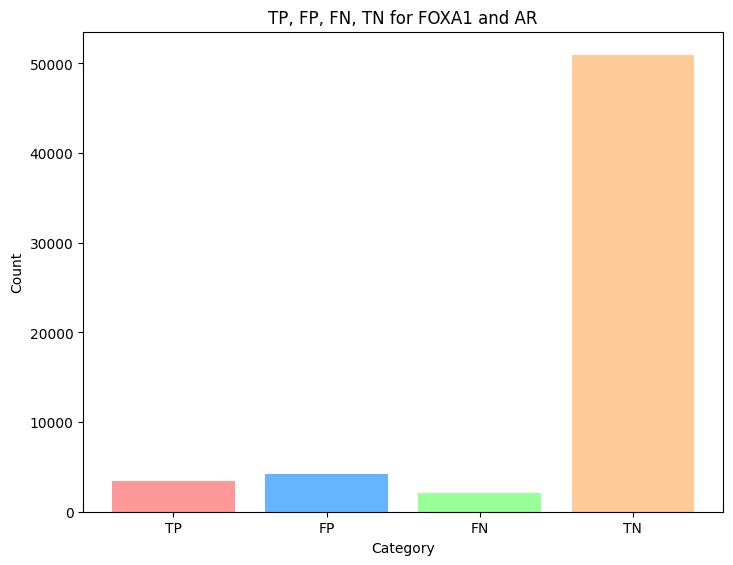

In [12]:
# get tp, fp, fn, tn
tp = joined_df['both_predicted_and_targets'].sum()
fp = joined_df['both_predicted'].sum() - tp
fn = joined_df['targets'].sum() - tp
tn = len(joined_df) - tp - fp - fn

print(f"TP: {tp}, FP: {fp}, FN: {fn}, TN: {tn}")

# graph in bar chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
categories = ['TP', 'FP', 'FN', 'TN']
values = [tp, fp, fn, tn]
# add colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
ax.bar(categories, values, color=colors)
# add descriptive labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('TP, FP, FN, TN for FOXA1 and AR')
plt.show()